## Step I

### Install /Import the library 

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [6]:
import requests
from urllib.parse import urlencode
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import csv
import re

### Methods to get dynamic data

In [2]:
# method to get the data from dynamic ajax link and append the data to dataframe
def requestURL(url):

    headers = {
        "User-Agent":
        "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3029.110 Safari/537.36 SE 2.X MetaSr 1.0",
        "referer": "https://www.toutiao.com/search/",
        'x-requested-with': 'XMLHttpRequest'
    }

    return requests.get(url, headers=headers)


def parse_ajax_web(offset, df):

    ajax_url = "https://bugcrowd.com/programs.json?sort[]=promoted-desc&offset[]={}".format(
        offset)
    response = requestURL(ajax_url)

    # put data from response into dataframe
    json = response.json()
    data = json.get('programs')

    for item in data:
        name = ""
        url = ""

        if item.get('name') is not None:
            name = item.get("name")

        if item.get('program_url') is not None:
            url = item.get('program_url')

        df = df.append(pd.DataFrame({
            'program_name': [name],
            'program_url': [url]
        }),
                       sort=True)

    df = df.reset_index(drop=True)

    return df


# main methode
def main():
    df = pd.DataFrame(columns=['program_name', 'program_url'])

    # since the total number is 210, the mehtode will be able to catch all data in 9 loops
    for offset in (range(0, 9)):
        df = parse_ajax_web(offset * 25, df)


#     save to csv
    df = df.reset_index(drop=True)
    df.to_csv(r".\result_I.csv")

    return df

### Excute and write into csv

In [3]:
df_main = main()
df_main.head()

,program_name,program_url
0,Hack for Men's health,/programs/teasers/FC5PB7qtMpJvLxM3cWrCSDQG
1,Zilliqa,/zilliqa
2,Octopus,/octopus-og
3,Cloudinary,/cloudinary
4,Accellion Kiteworks Public Program,/accellion-public


## Step II + III

In [7]:
def extraktion(df, element, className):
    #     add new column to save new info
    df["minBounty"] = 0
    df["maxBounty"] = 0

    #     iteration to get full url for request
    for index, row in df.iterrows():

        full_url = "https://bugcrowd.com{}".format(row["program_url"])
        response = requestURL(full_url)

        # use library beautifulSoup to find the element location
        soup = BeautifulSoup(response.text, 'html.parser')
        li_item = soup.find(element, attrs={'class': className})
        span_range = li_item.find('span', attrs={'class': "bc-stat__fig"})
        range = get_range(span_range.getText())

        # save into dataframe
        df["minBounty"][index] = num_only(range[0])
        df["maxBounty"][index] = num_only(range[1])

    return df


#turn html text into array of range
def get_range(inputStr):
    splitted = inputStr.split("–")

    #if the reward are in form of points or charity and so on it will be regarded here as 0 dollar
    if (len(splitted) == 1):

        return ["0", "0"]
    else:
        if (splitted[0].find("$") == -1):
            splitted[0] = "0"

        if (splitted[1].find("$") == -1):
            splitted[1] = "0"

        return splitted


#use regular expression to extract numbers
def num_only(inputStr):
    sub_str = re.sub(u"([^\u0030-\u0039])", "", inputStr)

    return sub_str

In [8]:
def main_II(path):
    df_I = pd.read_csv(path)
    df_II = extraktion(df_I, "li", "bc-stat bc-program-card__reward")
    result_csv = df_II.to_csv(r".\result_II.csv")
    return df_II


df_II = main_II("./result_I.csv")

C:\Users\cathy\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cathy\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
df_II.head()

,Unnamed: 0,program_name,program_url,minBounty,maxBounty
0,0,Hack for Men's health,/programs/teasers/FC5PB7qtMpJvLxM3cWrCSDQG,0,0
1,1,Zilliqa,/zilliqa,200,6000
2,2,Octopus,/octopus-og,150,3000
3,3,Cloudinary,/cloudinary,0,7000
4,4,Accellion Kiteworks Public Program,/accellion-public,250,10000


## Step IV

In [10]:
%matplotlib inline
def plotUsingBins(binStart, binEnd, binStep, df, columnName):

    bins = [i for i in range(binStart, binEnd, binStep)]
    #     print(bins)
    df[columnName] = df[columnName].astype(int)

    df["cut"] = pd.cut(df[columnName], bins)
    df["cut"].value_counts().plot(kind='bar')

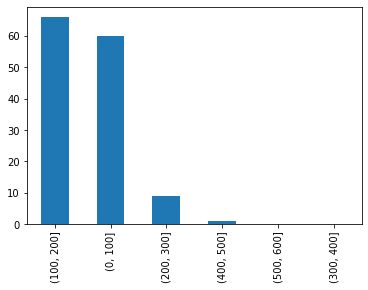

In [11]:
df_III = pd.read_csv("./result_II.CSV")
plotUsingBins(0, 700, 100, df_III, "minBounty")

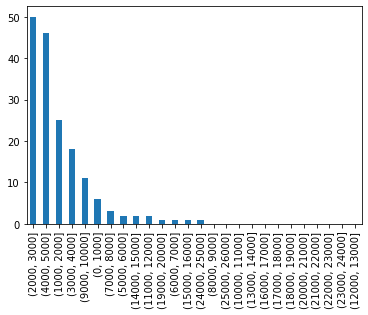

In [12]:
plotUsingBins(0, 27000, 1000, df_III, "maxBounty")

## Step V

Für solche Art Anzeigen auf einer Website für tech Menschen, die Nutzung und Emotionale Character von Wörter sollten relative einheitlich sein. Vorschlag wäre, genug Beispiele zu analysieren um Wörterbücher für relevante Topic aufzubauen. Dann Text-mining tech such as clustering zu benutzen um Information zu analysieren und classifizieren. 